<a href="https://colab.research.google.com/github/Guliko24/CE807_Text_Analytics/blob/main/Assignment/Text_analytics_code_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student ID: 2323017

**You student_id is your 7/8 digit faser number.**

This is a sample format for CE807: Assignment . You must follow the format.
The code will have three broad sections, and additional section, if needed,


1.   Common Codes
2.   Method/model 1 Specific Codes
3.   Method/model 2 Specific Codes
4.   Other Method/model Codes, if any

**You must have `train_unsup`, `test_unsup` for Unsupervised method  and `train_dis`, `test_dis` for Discriminatuve method to perform full training and testing. This will be evaluated automatically, without this your code will fail and no marked.**

You code should be proverly indended, print as much as possible, follow standard coding (https://peps.python.org/pep-0008/) and documentaion (https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.01-Help-And-Documentation.ipynb) practices.

Before each `code block/function`, you must have a `text block` which explain what code block/function is going to do. For each function/class, you need to properly document what are it's input, functionality and output.

If you are using any non-standard library, you must have command to install that, for example `pip install datasets`.

You must print `train`, `validation` and `test` performance measures.

You must also print `train` and `validation` loss in each `epoch`, wherever you are using `epoch`, say in any deep learning algorithms.

Your code must

*   To reproducibality of the results you must use a `seed`, you have to set seed in `torch`, `numpy` etc, use same seed everywhere **and your Student ID should be your seed**.
*   read dataset from './data/number/', where number is last digit of your student_id folder which will have 3 files [`train.csv`, `val.csv`, `test.csv`]
*   save model after finishing the training in './model/student_id/Model_Unsup/' and './model/student_id/Model_Dis/' for Unsupervised and Discriminative model respectively.
*   at testing time you will load models from './model/student_id/Model_Unsup/' and './model/student_id/Model_Dis/'  for Unsupervised and Discriminative model respectively. Your output file based on the test file will be named “test.csv” and you will add/modify “out_label_model_unsup” and “out_label_model_dis” column in the existing columns from test.csv. These outputs will be generated from your trained models.
*  after testing, your output file will be named “test.csv” and you will add/modify “out_label_model_unsup” and “out_label_model_Dis” column in the existing columns from test.csv. These outputs will be generated from your trained models.




**Install and import all required libraries first before starting to code.**








Let's install all require libraries. For example, `transformers`

In [1]:
!pip install transformers

Let's import all require libraries.
For example, `numpy`

In [2]:
import numpy as np
import os
import pickle
import pandas as pd

**Let's put your student id as a variable, that you will use different places**

In [3]:
student_id = 2323017 # this is my student ID corresponding to hmamay

Let's set `seed` for all libraries like `torch`, `numpy` etc as my student id

In [4]:
# set same seeds for all libraries
#numpy seed
np.random.seed(student_id)

train_unsup()
test_unsup()
train_dis()
test_dis()

# Common Codes

In this section you will write all common codes, for examples


*   Data read
*   Command Line argument reading
*   Performance Matrics
*   Print Dataset Statistics
*   Saving model and output
*   Loading Model and output
*   etc




**Let's first allow the GDrive access and set data and model paths**

For examples,

student_id = 12345670

set GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = ‘./CE807-24-SP/Assignment/’ in your GDrive

now set all global variable,


Sample output directory and file structure: https://drive.google.com/drive/folders/1ZCVOBjsxu3bnXRk8tUVkL97Bm1MmS_gE?usp=sharing   

In [63]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [66]:
# Add your code to initialize GDrive and data and models paths

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '/content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017'
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['data', 'model', '.ipynb_checkpoints', '__pycache__', 'sentiment_analysis.py', 'Text_analytics_code.ipynb']


In [69]:
# Set up model paths
MODEL_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'model')
MODEL_Dis_DIRECTORY = os.path.join(MODEL_PATH, 'model_dis')  # Model Discriminative directory
MODEL_Unsup_DIRECTORY = os.path.join(MODEL_PATH, 'model_unsup')  # Model Unsupervised directory
print('Model Discriminative directory: ', MODEL_Dis_DIRECTORY)
print('Model Unsupervised directory: ', MODEL_Unsup_DIRECTORY)

Model Discriminative directory:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis
Model Unsupervised directory:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_unsup


In [70]:
DATA_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'data', '37') # 37 is a dataset allocated to my StudetnID
train_file = os.path.join(DATA_PATH, 'train.csv')
print('Train file: ', train_file)

val_file = os.path.join(DATA_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(DATA_PATH, 'test.csv')
print('Test file: ', test_file)

Train file:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/data/37/train.csv
Validation file:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/data/37/valid.csv
Test file:  /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/data/37/test.csv


In [8]:
# Read train Data
train_df = pd.read_csv(train_file)
train_df.head()

,sentiment,text
0,positive,Works great
1,negative,I drive an SUV and these do not fit on my back...
2,positive,It does what is supposed to be.
3,positive,I use this on my 2006 bmw m5. works like a ch...
4,positive,…wasn’t what I thought it could do… thinking t...


In [139]:
train_df.shape

(3681, 2)

In [140]:
# Read Validation Data
val_df = pd.read_csv(val_file)
val_df.head()
val_df.shape

(454, 2)

In [154]:
# Read Test Data
test_df = pd.read_csv(test_file)
test_df.head()
test_df.shape

(409, 3)

Let's update the environment to be able to call functions saved in .py
---



In [149]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
import os
import sys
sys.path.append(GOOGLE_DRIVE_PATH)
from sentiment_analysis import preprocess_text
from sentiment_analysis import encode_sentiment

In [11]:
def read_data(file_name):
  df = pd.read_csv(file_name)
  print(file_name, 'has', len(df),'data points')
  return df

In [165]:
#let's modify all the data sets by removing empty rows and encoding the tartget_column='sentiment'
# Remove rows with NaNs in both 'text' and 'label' columns
train_df = train_df.dropna(subset=['text', 'sentiment'])
val_df = val_df.dropna(subset=['text', 'sentiment'])

#encode the sentiments
train_df['sentiment_encoded'] = train_df['sentiment'].map({'negative': 0, 'positive': 1})
val_df['sentiment_encoded'] = val_df['sentiment'].map({'negative': 0, 'positive': 1})


# Method Unsupervised Start

In this section you will write all details of your Method 1.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model


You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


In [16]:
# Your Code(s)

## Training Unsupervised Method Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

In [17]:
# Your Code(s)

## Testing Method Unsupervised Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [18]:
# Your Code(s)

## Method Unsupervised End


# Method Discriminative Start

In this section you will write all details of your Method 2.

You will have to enter multiple `code` and `text` cell.

Your code should follow the standard ML pipeline


*   Data reading
*   Data clearning, if any
*   Convert data to vector/tokenization/vectorization
*   Model Declaration/Initialization/building
*   Training and validation of the model using training and validation dataset
*   Save the trained model
*   Load and Test the model on testing set
*   Save the output of the model

You could add any other step(s) based on your method's requirement.

After finishing the above, you need to usd splited data as defined in the assignment and then do the same for all 4 sets. Your code should not be copy-pasted 4 time, make use of `function`.


In [19]:
# Your Code(s)

## Training Method Discriminative Code
Your test code should be a stand alone code that must take `train_file`, `val_file`,  and `model_dir` as input. You could have other things as also input, but these three are must. You would load both files, and train using the `train_file` and validating using the `val_file`. You will `print` / `display`/ `plot` all performance metrics, loss(if available) and save the output model in the `model_dir`.

Note that at the testing time, you need to use the same pre-processing and model. So, it would be good that you make those as seperate function/pipeline whichever it the best suited for your method. Don't copy-paste same code twice, make it a fucntion/class whichever is best.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score


In [21]:
def train_dis(train_df, val_df, model_dir):
    """
    Trains a text classifier using SVM on the provided training DataFrame and validates on the validation DataFrame.
    Saves the best model and vocab in the model_dir.

    Args:
        train_df: DataFrame containing training data with 'text' and 'sentiment' columns
        val_df: DataFrame containing validation data with 'text' and 'sentiment' columns
        model_dir: Directory to save the trained model and vocabulary
    """




    print('Training set has', len(train_df),'data points')
    print('Validation set has', len(val_df),'data points')

    # Create vocabulary using count vectorizer
    count_vectorizer = CountVectorizer() # Note no pre-processing is done here. In practice you will have different preprocessing steps.
    counts = count_vectorizer.fit_transform(train_data['text'].values)

    # NB classifier
    classifier = MultinomialNB()
    targets = train_data['label'].values

    #train the classifier
    print('Start training')
    classifier.fit(counts, targets)
    print('Done training')

    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(classifier, open(model_file, 'wb'))
    print('Saved model to', model_file)

    vocab_file = os.path.join(model_dir, 'vocab.sav')
    pickle.dump(count_vectorizer, open(vocab_file, 'wb'))
    print('Saved vocab to', vocab_file)

    # Testing on the validation data
    val_counts=count_vectorizer.transform(val_df['text'])
    predictions= classifier.predict(val_counts)
    print('Validation Done')
    target  = val_df['label']

    score=f1_score(target, predictions, average='macro')

    print('macro F1 Score on Validation set', score)
    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################
    return

In [22]:
train_Gen(train_file, val_file, MODEL_Dis_DIRECTORY)

Training set has 3681 data points
Validation set has 454 data points


KeyError: 'label'

In [ ]:
def test_Gen(test_file, model_dir):
    """
    Takes train_file, val_file and model_dir as input.
    It trained on the train_file datapoints, and validate on the val_file datapoints.
    While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
    After finishing the training, it saved the best model in the model_dir.

    ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory



    """

    ##########################################################################
    #                     TODO: Implement this function                      #
    ##########################################################################
    # Replace "pass" statement with your code

    # Read training and validation set data
    # test_df = pd.read_csv(test_file)
    # print('Testing set has', len(test_df),'data points')

    test_df = read_data(test_file)

    model_file = model_dir +'/model.sav'
    classifier = pickle.load(open(model_file, 'rb'))
    print('Model loaded')

    vocab_file = model_dir +'/vocab.sav'
    count_vectorizer = pickle.load(open(vocab_file, 'rb'))
    print('Vocab loaded')

    # Testing on the test data
    test_counts=count_vectorizer.transform(test_df['text'])
    predictions= classifier.predict(test_counts)
    print('Testing Done')
    target  = test_df['label']

    score=f1_score(target, predictions, average='macro')

    print('macro F1 Score on Test set', score)

    test_df['out_label_model_dis'] = predictions

    test_df.to_csv(test_file,index=False)
    print('Saved output to ',test_file)

    ##########################################################################
    #                            END OF YOUR CODE                            #
    ##########################################################################


In [ ]:
test_Gen(test_file, MODEL_Dis_DIRECTORY)

## Testing Method Discriminative Code
Your test code should be a stand alone code that must take `test_file`, `model_file` and `output_dir` as input. You could have other things as also input, but these three are must. You would load both files, and generate output based on inputs. Then you will `print` / `display`/ `plot` all performance metrics, and save the output file in the `output_dir`  

In [ ]:
# Your Code(s)

## Discriminative Method  End


# Other Method/model Start

Let's train 2 models, starting with SVM then proceeding to BERT. Both are discriminative models. After assessing the evaluation of the models, I will decide which one to choose to work with the test data.

# **Discriminative model SVM**

I ran the model on raw/unprocessed data and it failed to train. So let's pre-proces and modify the code and evaluate.

In [187]:

import os
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

model_dir=MODEL_Dis_DIRECTORY
def train_dis(train_df, val_df, model_dir):
    """
    Trains a text classifier using SVM on the provided training DataFrame and validates on the validation DataFrame.
    Saves the best model and vocab in the model_dir.

    Args:
        train_df: DataFrame containing training data with 'text', 'sentiment' and 'encoded_sentiment' columns
        val_df: DataFrame containing validation data with 'text', 'sentiment' and 'encoded_sentiment' columns
        model_dir: Directory to save the trained model and vocabulary
    """

    #encode the sentiments
    train_df['sentiment_encoded'] = train_df['sentiment'].map({'negative': 0, 'positive': 1})
    val_df['sentiment_encoded'] = val_df['sentiment'].map({'negative': 0, 'positive': 1})

    # Remove rows with NaNs in both 'text' and 'label' columns
    train_df = train_df.dropna(subset=['text', 'sentiment'])
    val_df = val_df.dropna(subset=['text', 'sentiment'])

    # Preprocess the data
    train_df['text'] = train_df['text'].apply(preprocess_text)
    val_df['text'] = val_df['text'].apply(preprocess_text)

   # Check if preprocessed texts are empty
    train_df = train_df[train_df['text'].str.strip() != '']
    val_df = val_df[val_df['text'].str.strip() != '']

    if train_df.empty:
        raise ValueError("Training data is empty after preprocessing. Adjust preprocessing steps.")

    if val_df.empty:
        raise ValueError("Validation data is empty after preprocessing. Adjust preprocessing steps.")

    print('Training set has', len(train_df), 'data points')
    print('Validation set has', len(val_df), 'data points')

    # Create vocabulary using TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    counts = tfidf_vectorizer.fit_transform(train_df['text'].values)
    targets = train_df['sentiment_encoded'].values
    print(f"Feature matrix shape: {counts.shape}")
    print(f"Number of targets: {len(targets)}")
    if counts.shape[0] != len(targets):
        raise ValueError(f"Feature matrix has {counts.shape[0]} samples, but target has {len(targets)} samples. Check preprocessing steps.")


    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=student_id)
    counts_resampled, targets_resampled = smote.fit_resample(counts, train_df['sentiment_encoded'].values)

    # Ensure SMOTE output is valid
    print(f"SMOTE feature matrix shape: {counts_resampled.shape}")
    print(f"Number of SMOTE targets: {len(targets_resampled)}")


    # SVM classifier
    classifier = SVC(kernel='linear', probability=True)  # You can choose other kernels like 'rbf', 'poly', etc.
    targets = train_df['sentiment_encoded'].values

    # Train the classifier
    print('Start training')
    classifier.fit(counts_resampled, targets_resampled)
    print('Done training')

    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(classifier, open(model_file, 'wb'))
    print('Saved model to', model_file)

    vocab_file = os.path.join(model_dir, 'vocab.sav')
    pickle.dump(tfidf_vectorizer, open(vocab_file, 'wb'))
    print('Saved vocab to', vocab_file)

    # Testing on the validation data
    #val_counts = tfidf_vectorizer.transform(val_df['text'])
    #predictions = classifier.predict(val_counts)
    #print('Validation Done')
    #target = val_df['sentiment_encoded']

    #score = f1_score(target, predictions, average='macro')

    #print('Macro F1 Score on Validation set:', score)

    return


In [167]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [200]:
model_dir=MODEL_Dis_DIRECTORY

def test_model(val_df, model_dir):
    """
    Loads the saved model and vocabulary, then tests it on the validation data.

    Args:
        val_df: Validation dataframe define earliere
        model_dir: Model directory where the model and vocabulary are saved
    """


     #encode the sentiments
    #train_df['sentiment_encoded'] = train_df['sentiment'].map({'negative': 0, 'positive': 1})
   # val_df['sentiment_encoded'] = val_df['sentiment'].map({'negative': 0, 'positive': 1})

    # Remove rows with NaNs in both 'text' and 'label' columns
    #train_df = train_df.dropna(subset=['text', 'sentiment'])
    #val_df = val_df.dropna(subset=['text', 'sentiment'])

    # Preprocess the text data
    val_df['text'] = val_df['text'].apply(preprocess_text)

    # Check if preprocessed texts are empty
    val_df = val_df[val_df['text'].str.strip() != '']

    if val_df.empty:
        raise ValueError("Validation data is empty after preprocessing. Adjust preprocessing steps.")


    # Load the saved model and vocabulary
    model_file = os.path.join(model_dir, 'model.sav')
    vocab_file = os.path.join(model_dir, 'vocab.sav')

    classifier = pickle.load(open(model_file, 'rb'))
    tfidf_vectorizer = pickle.load(open(vocab_file, 'rb'))
    print('Loaded model and vocabulary from', model_dir)

    # Testing on the validation data
    val_counts = tfidf_vectorizer.transform(val_df['text'])
    predictions = classifier.predict(val_counts)
    target = val_df['sentiment_encoded']

   # Compute confusion matrix
    cm = confusion_matrix(target, predictions)
    class_names = [str(cls) for cls in classifier.classes_]
    plot_confusion_matrix(cm, class_names)

    # Print classification report
    report = classification_report(target, predictions, target_names=class_names)
    print("Classification Report:")
    print(report)

    # Calculate and print Macro F1 Score
    score = f1_score(target, predictions, average='macro')
    print('Macro F1 Score on Validation set:', score)

    return

In [195]:
#Let's now train and test our SVM model on the data we have and save the model and then validate it
#on the validation file
train_dis(train_df, val_df, model_dir )



Training set has 3666 data points
Validation set has 454 data points
Feature matrix shape: (3666, 8240)
Number of targets: 3666
SMOTE feature matrix shape: (6034, 8240)
Number of SMOTE targets: 6034
Start training
Done training
Saved model to /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis/model.sav
Saved vocab to /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis/vocab.sav


Loaded model and vocabulary from /content/gdrive/MyDrive/CE807-24-SU/Assignment_StudentID_2323017/model/model_dis


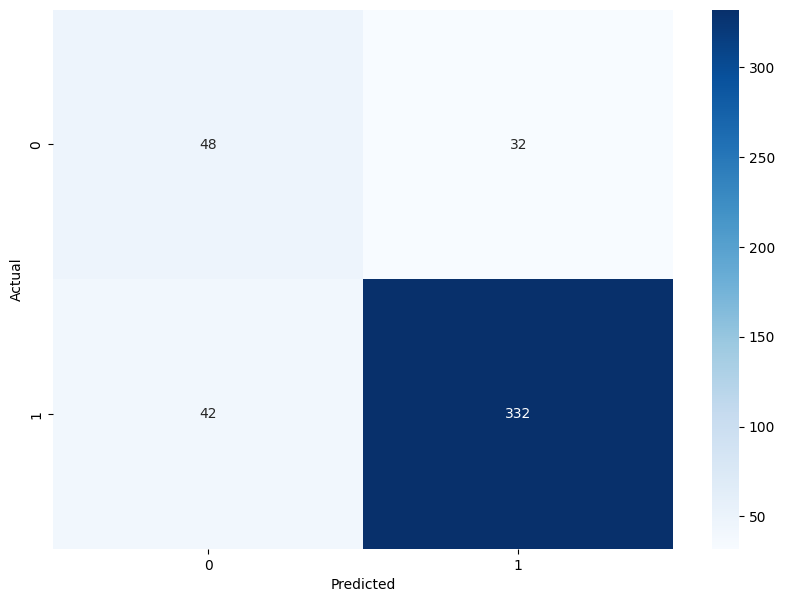

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.60      0.56        80
           1       0.91      0.89      0.90       374

    accuracy                           0.84       454
   macro avg       0.72      0.74      0.73       454
weighted avg       0.85      0.84      0.84       454

Macro F1 Score on Validation set: 0.732217439821457


In [201]:
#Initialize and test the saved model on the validation set, i.e fine tune it
test_model(val_df, model_dir)

# **Discriminative Model** **BERT**

In [209]:
import os
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define a Dataset class
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = self.data.iloc[index]['text']
        sentiment = self.data.iloc[index]['sentiment_encoded']

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(sentiment, dtype=torch.long)
        }

In [214]:
# Preprocess text data
train_df['text'] = train_df['text'].apply(preprocess_text)
val_df['text'] = val_df['text'].apply(preprocess_text)

# Parameters
PRE_TRAINED_MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 128
BATCH_SIZE = 4
EPOCHS = 2
LEARNING_RATE = 5e-5

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

# Create DataLoader
train_dataset = SentimentDataset(train_df, tokenizer, MAX_LEN)
val_dataset = SentimentDataset(val_df, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Initialize DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=2)
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training function
def train_epoch(model, data_loader, optimizer, device, scheduler):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in tqdm(data_loader, desc="Training"):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        preds = torch.argmax(outputs.logits, dim=1)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Evaluation function
def eval_model(model, data_loader, device):
    model = model.eval()
    losses = []
    correct_predictions = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for d in tqdm(data_loader, desc="Evaluating"):
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )

            loss = outputs.loss
            preds = torch.argmax(outputs.logits, dim=1)

            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses), all_preds, all_labels

# Training loop
device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')

    train_acc, train_loss = train_epoch(
        model,
        train_loader,
        optimizer,
        device,
        scheduler
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss, preds, labels = eval_model(
        model,
        val_loader,
        device
    )

    print(f'Val   loss {val_loss} accuracy {val_acc}')

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), os.path.join(model_dir, 'best_model_state.bin'))
        best_accuracy = val_acc

# Load best model
model.load_state_dict(torch.load(os.path.join(model_dir, 'best_model_state.bin')))

# Evaluate the best model
val_acc, val_loss, preds, labels = eval_model(model, val_loader, device)

# Classification report
class_names = ['negative', 'positive']
report = classification_report(labels, preds, target_names=class_names)
print("Classification Report:")
print(report)

# Confusion Matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Macro F1 Score
score = f1_score(labels, preds, average='macro')
print('Macro F1 Score on Validation set:', score)

Epoch 1/2


Training: 100%|█████████▉| 916/920 [44:16<00:11,  2.76s/it]

##Other Method/model End